# Augment a data set to create more images for taining
Based on https://medium.com/@thimblot/data-augmentation-boost-your-image-dataset-with-few-lines-of-python-155c2dc1baec

In [33]:
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util

def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

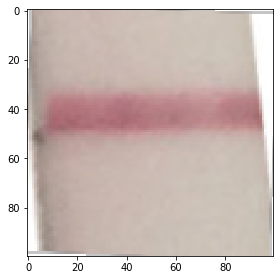

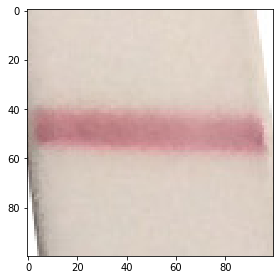

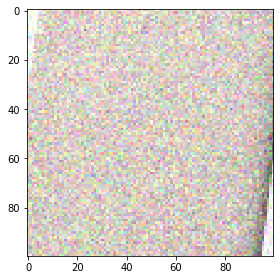

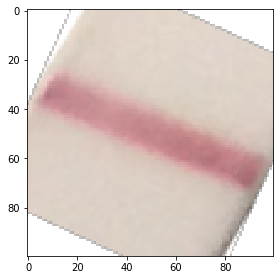

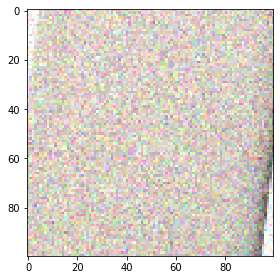

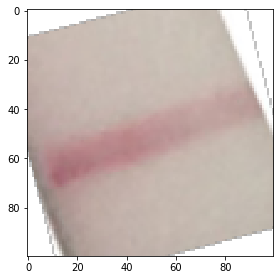

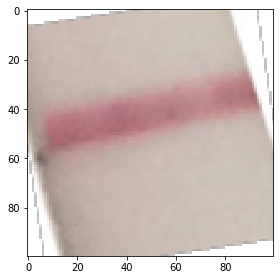

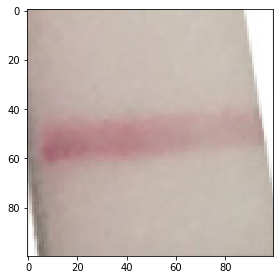

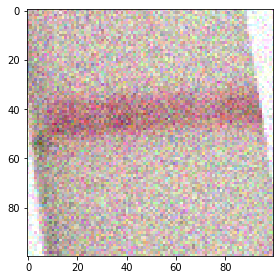

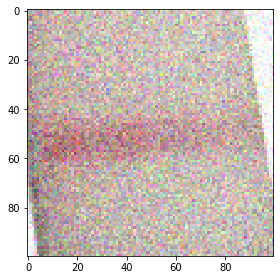

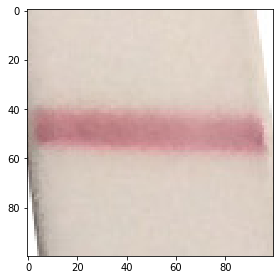

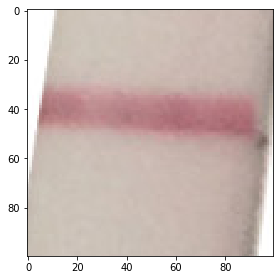

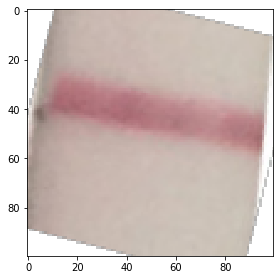

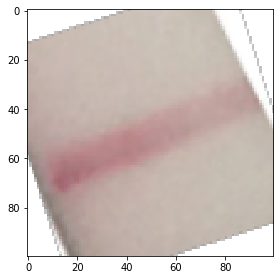

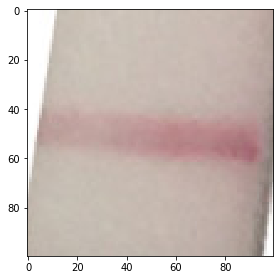

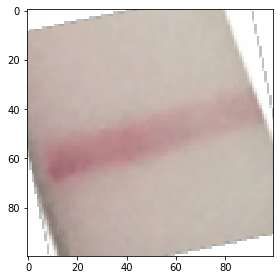

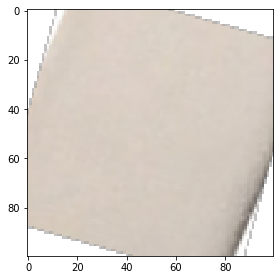

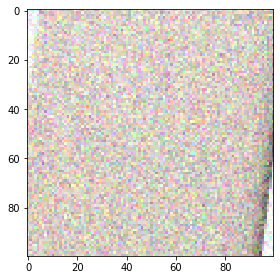

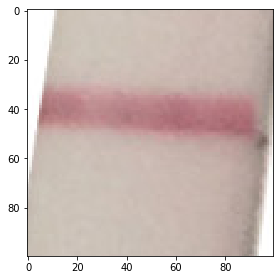

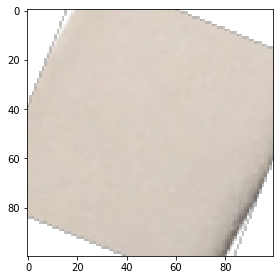

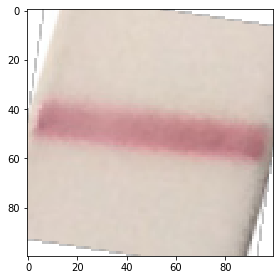

In [34]:
import random
import os

from skimage import data, io
from matplotlib import pyplot as plt

# our folder path containing some images
folder_path = 'TestImages1'

# the number of file to generate
num_files_desired = 20

# loop on all files of the folder and build a list of files paths
images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# dictionary of the transformations functions we defined earlier
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
    'horizontal_flip': horizontal_flip
}

# random num of transformations to apply
num_transformations_to_apply = random.randint(1, len(available_transformations))

num_generated_files = 0
transformed_image = None

while num_generated_files <= num_files_desired:
    # random image from the folder
    image_path = random.choice(images)
    # read image as an two dimensional array of pixels
    image_to_transform = sk.io.imread(image_path)
    
    key = random.choice(list(available_transformations))
    transformed_image = available_transformations[key](image_to_transform)
    
    io.imshow(transformed_image)
    plt.show()
    
    num_generated_files += 1